In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from numpy import matlib
import qgrid
from sklearn.neural_network import MLPClassifier


In [2]:
X = np.genfromtxt('Data_OpenCV/Features_X.csv',delimiter=',')
Y = np.genfromtxt('Data_OpenCV/Y_labels.csv',delimiter=',')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.7)

In [4]:
sfs = SFS(LogisticRegression(),
           k_features=75,
           forward=True,
           scoring = 'accuracy',
          verbose=True)

In [5]:
sfs.fit(X_train, y_train)
type(sfs.k_feature_names_)   

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   19.1s finished
Features: 1/75[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 149 out of 149 | elapsed:   26.8s finished
Features: 2/75[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 148 out of 148 | elapsed:   29.1s finished
Features: 3/75[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:   33.8s finished
Features: 4/75[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 146 out of 146 | elapsed:   39.2s finished
Features: 5/75[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:   41.5s finished
Features: 6/75[Parallel(

tuple

In [6]:
features = list(sfs.k_feature_idx_)

In [7]:
features

[0,
 1,
 2,
 3,
 5,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 19,
 21,
 30,
 32,
 33,
 35,
 38,
 39,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 56,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 76,
 77,
 78,
 79,
 81,
 97,
 98,
 99,
 103,
 109,
 110,
 112,
 113,
 114,
 115,
 120,
 121,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 133,
 135,
 139,
 140,
 141,
 142,
 143,
 145,
 147]

In [9]:
df_X = pd.DataFrame(X)

In [10]:
lista = []
for i in range(150):
    if i not in features:
        lista.append(i)
df_X.drop(lista,axis=1,inplace=True)
df_X.head()

,0,1,2,3,5,7,8,10,11,12,...,131,133,135,139,140,141,142,143,145,147
0,-0.003290,0.001521,0.003442,0.002179,-0.000187,0.067577,0.018950,0.079627,0.063043,0.000871,...,0.002407,-0.008114,0.013818,0.027939,-0.000061,-0.000671,0.002140,0.002037,0.001468,0.013984
1,-0.000229,-0.000170,0.000229,0.000170,-0.012825,0.012825,0.034417,0.065312,0.033458,-0.003953,...,0.000056,-0.010860,0.010860,0.030882,-0.003955,-0.001892,0.003967,0.001932,-0.001804,0.001804
2,-0.002089,-0.000260,0.002089,0.000261,0.019164,0.023341,-0.005523,0.019890,0.007933,-0.002129,...,0.000636,0.002930,0.018037,0.030488,-0.001057,-0.000855,0.003319,0.003168,-0.000680,0.001552
3,-0.001413,-0.000189,0.001413,0.000189,0.020158,0.026545,0.011796,0.036803,0.016512,-0.002148,...,0.000153,-0.001357,0.001906,0.016573,-0.002405,0.000072,0.002406,0.000598,-0.002623,0.002623
4,0.000653,0.000122,0.001217,0.000285,0.015148,0.018371,0.020907,0.049392,0.022454,-0.001707,...,0.000533,0.017219,0.021694,0.017024,-0.001496,-0.000251,0.001499,0.000386,-0.021919,0.022771


In [11]:
X_new = df_X.to_numpy()

In [12]:
X_new.shape

(13493, 75)

In [19]:
def Redes_Neuronales():
    random.seed(19680801)
    X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=.7)
    modelo =MLPClassifier(hidden_layer_sizes=(100,100,100,100,100),activation = 'relu',max_iter=1000)
    modelo.fit(X_train,y_train)

    #Validación con muestras de entrenamiento
    Ytrain_pred = modelo.predict(X_train)
    #Validación con las muestras de test    
    Yest = modelo.predict(X_test)
    print('Validacion',np.mean(Yest==y_test))
    print('Entrenamiento', np.mean(Ytrain_pred==y_train))
    plot_confusion_matrix(modelo,X=X_test, y_true=y_test)
    plt.show()

Validacion 0.31071352953631165
Entrenamiento 0.9038794168519891


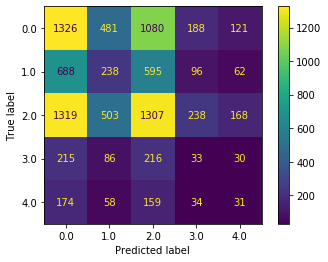

In [20]:
Redes_Neuronales()

In [25]:
np.savetxt('X_foward',X_new,delimiter=',')